## 🎊 恭喜你完成了线性回归教程！

### 你已经学会了：
- ✅ 线性回归的基本原理
- ✅ 梯度下降算法的实现
- ✅ 如何用Python从零实现机器学习算法
- ✅ 如何可视化和分析模型性能

### 继续学习的方向：
1. **多元线性回归**：处理多个特征
2. **正则化技术**：Ridge回归、Lasso回归
3. **非线性回归**：多项式回归
4. **其他ML算法**：逻辑回归、决策树、神经网络

记住：**机器学习就是让计算机从数据中学习规律，然后用这些规律做预测！** 🚀

# 线性回归完整教程 - 从零开始学机器学习

## 🎯 学习目标
- 理解线性回归的基本概念
- 掌握梯度下降算法原理
- 学会用Python实现线性回归
- 通过实际例子理解机器学习流程

---

## 📚 第一部分：什么是线性回归？

### 简单理解
想象你要预测房价：
- **输入**：房子面积（比如100平米）
- **输出**：房价（比如200万）
- **目标**：找到面积和房价之间的关系

线性回归就是画一条直线，让这条线尽可能接近所有的数据点。

### 数学公式
```
预测值 = θ₀ + θ₁ × 特征值
```
- θ₀：截距（当特征为0时的预测值）
- θ₁：斜率（特征变化1单位时，预测值的变化）

In [11]:
# 导入必要的库
import numpy as np
import sys
sys.path.append('..') 
from utils.features import prepare_for_training
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
import warnings
warnings.filterwarnings('ignore')

print("✅ 库导入成功！")

✅ 库导入成功！


## 🔧 第二部分：数据预处理工具

在机器学习中，原始数据通常需要预处理才能用于训练模型。
就像学开车：
- 初始化：不会开车（参数=0）
- 训练：练习500次，每次犯错后调整
- 梯度下降：每次根据错误程度调整方向盘
- 损失函数：看撞了几次墙（错误程度）
- 预测：学会后可以开新路线


In [15]:
# 简化版的数据预处理函数
def prepare_for_training(data, polynomial_degree=0, sinusoid_degree=0, normalize_data=True):
    """
    数据预处理函数
    
    参数说明：
    - data: 原始特征数据
    - polynomial_degree: 多项式特征的度数（0表示不添加）
    - sinusoid_degree: 正弦特征的度数（0表示不添加）
    - normalize_data: 是否标准化数据
    
    返回：
    - 处理后的数据, 均值, 标准差
    """
    
    # 1. 复制数据，避免修改原始数据
    data_processed = np.copy(data)
    features_mean = 0
    features_deviation = 1
    
    # 2. 数据标准化（让数据分布更均匀，有助于训练）
    if normalize_data:
        features_mean = np.mean(data_processed, axis=0)
        features_deviation = np.std(data_processed, axis=0)
        # 避免除零错误
        features_deviation[features_deviation == 0] = 1
        data_processed = (data_processed - features_mean) / features_deviation
    
    # 3. 添加偏置项（截距项，相当于在每行前面加个1）
    data_processed = np.column_stack((np.ones(data_processed.shape[0]), data_processed))
    
    return data_processed, features_mean, features_deviation

print("✅ 数据预处理函数定义完成！")

✅ 数据预处理函数定义完成！


## 🧠 第三部分：线性回归类实现

现在我们来实现完整的线性回归算法。


1. __init__ - 初始化（准备工作）
```
# 就像准备考试一样，先整理好资料
def __init__(self, data, labels, ...):
    # 🎯 设定目标：保存训练数据和标签  
    # 🔧 初始化参数：θ = [0, 0, 0...] （一开始不知道答案）
```    
简单理解：
- data = 房子面积 [100, 120, 80...]
- labels = 房价 [200万, 240万, 160万...]
- theta = [截距, 斜率] 一开始都是0，需要学习

2. train - 训练（学习过程）
```
def train(self, alpha, num_iterations=500):
    # 🎓 开始学习：调用梯度下降算法
    # 📈 记录进度：保存每次的学习效果
```
简单理解：
- alpha = 学习速度（步子大小）
- num_iterations = 学习次数（练习500次）

3. gradient_descent - 梯度下降（核心学习算法）
```
def gradient_descent(self, alpha, num_iterations):
    for i in range(num_iterations):  # 重复学习500次
        self.gradient_step(alpha)    # 每次调整一点参数
        # 记录这次学习后的效果好不好
```       
简单理解：就像学骑自行车，每次摔倒后调整一点，慢慢学会平衡。

4. gradient_step - 梯度步骤（一次学习）
```
def gradient_step(self, alpha):
    # 1️⃣ 用当前参数预测所有房价
    prediction = 当前直线预测的房价
    
    # 2️⃣ 看看预测错了多少
    delta = prediction - 真实房价
    
    # 3️⃣ 根据错误调整直线参数
    theta = theta - alpha * 调整量
```
核心公式解释：
- 如果预测高了 → 降低参数
- 如果预测低了 → 提高参数
- 调整幅度 = 学习率 × 错误程度

5. cost_function - 损失函数（评分系统）
```
def cost_function(self, data, labels):
    # 计算所有预测的平均错误程度
    delta = 预测值 - 真实值
    cost = (错误的平方) 的平均值
```
简单理解：
- 就像考试评分，错得越多分数越低
- 损失 = 0 表示预测完全正确
- 损失越大表示预测越差

6. hypothesis - 假设函数（预测公式）
```
@staticmethod
def hypothesis(data, theta):
    # 房价 = θ₀ + θ₁ × 面积
    return np.dot(data, theta)
```
简单理解：
这就是那条直线的数学公式:
- θ₀ = 截距（面积为0时的基础价格）
- θ₁ = 斜率（面积每增加1平米，价格增加多少）

7. predict - 预测（使用学会的知识）
```
def predict(self, data):
    # 用学到的参数预测新数据
    return 预测结果
```

In [16]:
class LinearRegression:
    """
    线性回归类 - 完整实现
    
    这个类包含了线性回归的所有核心功能：
    1. 数据预处理
    2. 参数初始化
    3. 梯度下降训练
    4. 预测功能
    """

    def __init__(self, data, labels, polynomial_degree=0, sinusoid_degree=0, normalize_data=True):
        """
        初始化线性回归模型
        
        参数：
        - data: 训练特征数据 (m x n矩阵，m个样本，n个特征)
        - labels: 训练标签数据 (m x 1矩阵)
        - normalize_data: 是否标准化数据
        """
        print("🔄 开始初始化线性回归模型...")
        
        # 1. 数据预处理
        (data_processed, features_mean, features_deviation) = prepare_for_training(
            data, polynomial_degree, sinusoid_degree, normalize_data=normalize_data
        )
        
        # 2. 保存处理后的数据和参数
        self.data = data_processed
        self.labels = labels
        self.features_mean = features_mean
        self.features_deviation = features_deviation
        self.polynomial_degree = polynomial_degree
        self.sinusoid_degree = sinusoid_degree
        self.normalize_data = normalize_data
        
        # 3. 初始化参数θ（权重）
        num_features = self.data.shape[1]  # 特征数量（包括偏置项）
        self.theta = np.zeros((num_features, 1))  # 初始化为零向量
        
        print(f"✅ 模型初始化完成！")
        print(f"   - 样本数量: {self.data.shape[0]}")
        print(f"   - 特征数量: {num_features-1} (+ 1个偏置项)")
        print(f"   - 参数θ形状: {self.theta.shape}")
        
    def train(self, alpha, num_iterations=500):
        """
        训练模型
        
        参数：
        - alpha: 学习率（控制每次参数更新的步长）
        - num_iterations: 迭代次数
        
        返回：
        - theta: 训练后的参数
        - cost_history: 损失函数历史记录
        """
        print(f"🚀 开始训练模型...")
        print(f"   - 学习率: {alpha}")
        print(f"   - 迭代次数: {num_iterations}")
        
        cost_history = self.gradient_descent(alpha, num_iterations)
        
        print(f"✅ 训练完成！")
        print(f"   - 最终损失: {cost_history[-1]:.6f}")
        
        return self.theta, cost_history
        
    def gradient_descent(self, alpha, num_iterations):
        """
        梯度下降算法实现
        
        这是机器学习的核心：通过不断调整参数，让预测越来越准确
        """
        cost_history = []
        
        for i in range(num_iterations):
            # 执行一步梯度下降
            self.gradient_step(alpha)
            
            # 记录当前损失
            current_cost = self.cost_function(self.data, self.labels)
            cost_history.append(current_cost)
            
            # 每100次迭代打印一次进度
            if (i + 1) % 100 == 0:
                print(f"   迭代 {i+1}/{num_iterations}, 损失: {current_cost:.6f}")
        
        return cost_history
        
    def gradient_step(self, alpha):    
        """
        执行一步梯度下降
        
        核心思想：
        1. 计算预测值
        2. 计算预测误差
        3. 根据误差调整参数
        """
        num_examples = self.data.shape[0]
        
        # 1. 计算预测值
        prediction = LinearRegression.hypothesis(self.data, self.theta)
        
        # 2. 计算误差
        delta = prediction - self.labels
        
        # 3. 更新参数（这是梯度下降的核心公式）
        theta = self.theta
        theta = theta - alpha * (1/num_examples) * (np.dot(delta.T, self.data)).T
        self.theta = theta
        
    def cost_function(self, data, labels):
        """
        计算损失函数（均方误差）
        
        损失函数告诉我们模型预测的好坏：
        - 损失越小，预测越准确
        - 损失为0，预测完全正确
        """
        num_examples = data.shape[0]
        
        # 计算预测值与真实值的差异
        delta = LinearRegression.hypothesis(self.data, self.theta) - labels
        
        # 计算均方误差
        cost = (1/2) * np.dot(delta.T, delta) / num_examples
        
        return cost[0][0]
        
    @staticmethod
    def hypothesis(data, theta):   
        """
        假设函数：计算预测值
        
        公式：h(x) = θ₀ + θ₁x₁ + θ₂x₂ + ... = θᵀx
        """
        predictions = np.dot(data, theta)
        return predictions
        
    def predict(self, data):
        """
        使用训练好的模型进行预测
        
        参数：
        - data: 需要预测的特征数据
        
        返回：
        - predictions: 预测结果
        """
        # 对新数据进行同样的预处理
        data_processed = prepare_for_training(
            data,
            self.polynomial_degree,
            self.sinusoid_degree,
            self.normalize_data
        )[0]
         
        predictions = LinearRegression.hypothesis(data_processed, self.theta)
        
        return predictions

print("✅ LinearRegression类定义完成！")

✅ LinearRegression类定义完成！


## 🎮 第四部分：实战演练

现在让我们用一个简单的例子来测试我们的线性回归模型！

In [19]:
# 使用numpy生成可控的线性回归数据
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以确保结果可重复
np.random.seed(42)

# 生成X值 (100个数据点,范围从0到10)
X = np.linspace(0, 10, 100).reshape(-1, 1)

# 设置真实的系数
true_slope = 2.5
true_intercept = 7.0

# 生成y值: y = slope*X + intercept + noise
y = true_slope * X + true_intercept + np.random.randn(100, 1) * 3

# 显示数据信息
print(f"数据集生成完成:")
print(f"X形状: {X.shape}")
print(f"y形状: {y.shape}")
print(f"\n真实模型: y = {true_slope} * X + {true_intercept}")
print("\n前5个样本:")
for i in range(5):
    print(f"X[{i}] = {X[i][0]:.4f}, y[{i}] = {y[i][0]:.4f}")

数据集生成完成:
X形状: (100, 1)
y形状: (100, 1)

真实模型: y = 2.5 * X + 7.0

前5个样本:
X[0] = 0.0000, y[0] = 8.4901
X[1] = 0.1010, y[1] = 6.8377
X[2] = 0.2020, y[2] = 9.4481
X[3] = 0.3030, y[3] = 12.3267
X[4] = 0.4040, y[4] = 7.3076


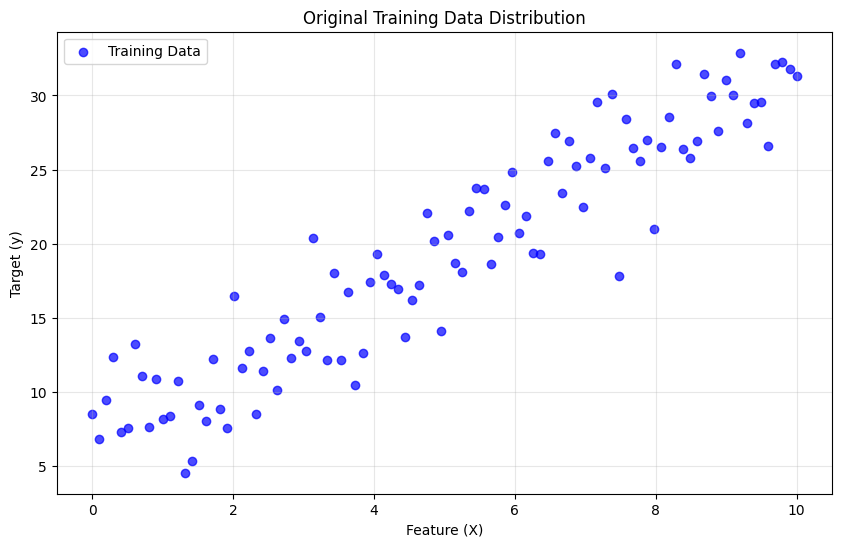

上图展示了原始训练数据分布
📈 可以看到数据大致呈线性关系，适合用线性回归！


In [21]:
# 2. 可视化原始数据
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, color='blue', label='Training Data')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Original Training Data Distribution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 用打印语句说明图形内容
print("上图展示了原始训练数据分布")
print("📈 可以看到数据大致呈线性关系，适合用线性回归！")


In [22]:
# 3. 创建并训练模型
print("\n" + "="*50)
print("🤖 开始训练线性回归模型")
print("="*50)

# 创建模型实例
model = LinearRegression(X, y, normalize_data=True)

# 训练模型
theta, cost_history = model.train(alpha=0.01, num_iterations=1000)

print(f"\n📋 训练结果：")
print(f"   - θ₀ (截距): {theta[0][0]:.4f}")
print(f"   - θ₁ (斜率): {theta[1][0]:.4f}")


🤖 开始训练线性回归模型
🔄 开始初始化线性回归模型...
✅ 模型初始化完成！
   - 样本数量: 100
   - 特征数量: 1 (+ 1个偏置项)
   - 参数θ形状: (2, 1)
🚀 开始训练模型...
   - 学习率: 0.01
   - 迭代次数: 1000
   迭代 100/1000, 损失: 32.010879
   迭代 200/1000, 损失: 7.464565
   迭代 300/1000, 损失: 4.175858
   迭代 400/1000, 损失: 3.735238
   迭代 500/1000, 损失: 3.676204
   迭代 600/1000, 损失: 3.668295
   迭代 700/1000, 损失: 3.667235
   迭代 800/1000, 损失: 3.667093
   迭代 900/1000, 损失: 3.667074
   迭代 1000/1000, 损失: 3.667072
✅ 训练完成！
   - 最终损失: 3.667072

📋 训练结果：
   - θ₀ (截距): 19.1876
   - θ₁ (斜率): 7.4097


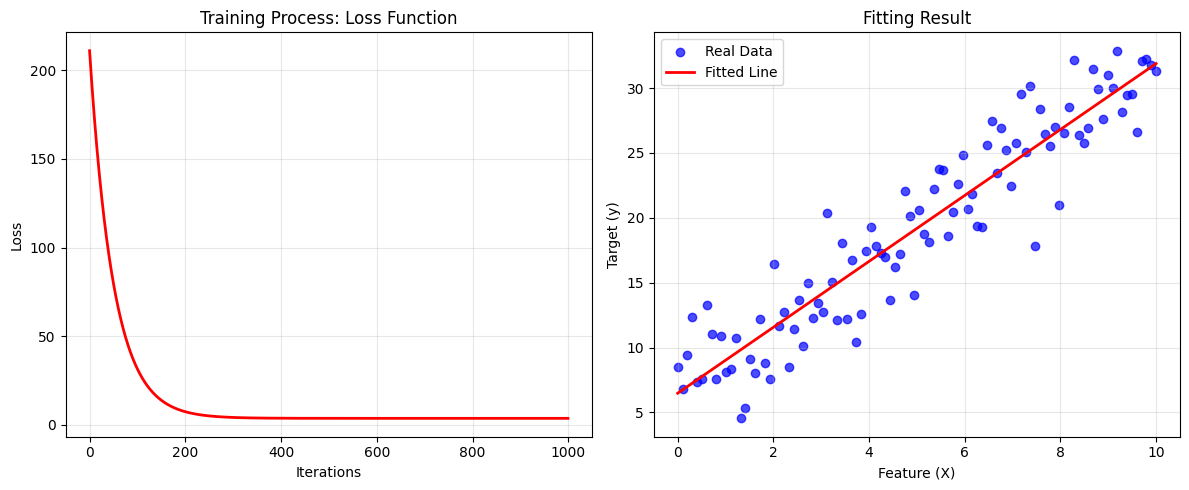

📊 左图显示损失在不断下降，说明模型在学习！
📊 右图显示红线很好地拟合了蓝色数据点！


In [23]:
# 4. 可视化训练过程
plt.figure(figsize=(12, 5))

# 左图：损失函数变化
plt.subplot(1, 2, 1)
plt.plot(cost_history, color='red', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Process: Loss Function')
plt.grid(True, alpha=0.3)

# 右图：拟合结果
plt.subplot(1, 2, 2)
plt.scatter(X, y, alpha=0.7, color='blue', label='Real Data')

# 生成预测线
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_line = model.predict(X_line)
plt.plot(X_line, y_pred_line, color='red', linewidth=2, label='Fitted Line')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Fitting Result')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 左图显示损失在不断下降，说明模型在学习！")
print("📊 右图显示红线很好地拟合了蓝色数据点！")

In [24]:
# 5. 测试预测功能
print("\n" + "="*50)
print("🔮 测试模型预测能力")
print("="*50)

# 创建测试数据
test_X = np.array([[-1.5], [0], [1.5]])
predictions = model.predict(test_X)

print("📝 预测结果：")
for i, (x_val, pred_val) in enumerate(zip(test_X, predictions)):
    print(f"   输入 {x_val[0]:6.2f} → 预测 {pred_val[0]:8.2f}")

# 计算训练集上的准确性
train_predictions = model.predict(X)
mse = np.mean((train_predictions - y) ** 2)
rmse = np.sqrt(mse)

print(f"\n📊 模型性能评估：")
print(f"   - 均方误差 (MSE): {mse:.4f}")
print(f"   - 均方根误差 (RMSE): {rmse:.4f}")


🔮 测试模型预测能力
📝 预测结果：
   输入  -1.50 → 预测    10.11
   输入   0.00 → 预测    19.19
   输入   1.50 → 预测    28.26

📊 模型性能评估：
   - 均方误差 (MSE): 7.3341
   - 均方根误差 (RMSE): 2.7082


## 🎓 第五部分：核心概念总结

### 🔑 关键概念回顾

1. **线性回归的本质**
   - 找到一条直线，让它尽可能接近所有数据点
   - 公式：`y = θ₀ + θ₁x`

2. **梯度下降算法**
   - 机器学习的核心优化算法
   - 通过不断调整参数，让预测误差越来越小
   - 就像下山找最低点一样

3. **损失函数**
   - 衡量模型预测好坏的标准
   - 均方误差：`(预测值 - 真实值)²` 的平均值
   - 损失越小，模型越好

4. **学习率 (α)**
   - 控制每次参数更新的步长
   - 太大：可能错过最优解
   - 太小：训练速度慢

### 🚀 下一步学习建议

1. **尝试不同的学习率**：看看对训练效果的影响
2. **多特征回归**：尝试用多个特征预测目标值
3. **正则化**：学习如何防止过拟合
4. **其他算法**：逻辑回归、决策树等

### 💡 实际应用场景

- 🏠 **房价预测**：根据面积、位置等预测房价
- 📈 **股票分析**：根据历史数据预测价格趋势
- 🛒 **销售预测**：根据广告投入预测销售额
- 🌡️ **温度预测**：根据历史气象数据预测温度

## 🎯 第六部分：动手练习

现在轮到你了！尝试修改下面的参数，看看对结果有什么影响：

🎯 当前参数设置：
   学习率: 0.01
   迭代次数: 1000
   噪声水平: 10
   样本数量: 100
🔄 开始初始化线性回归模型...
✅ 模型初始化完成！
   - 样本数量: 100
   - 特征数量: 1 (+ 1个偏置项)
   - 参数θ形状: (2, 1)
🚀 开始训练模型...
   - 学习率: 0.01
   - 迭代次数: 1000
   迭代 100/1000, 损失: 147.835682
   迭代 200/1000, 损失: 53.605260
   迭代 300/1000, 损失: 40.980299
   迭代 400/1000, 损失: 39.288811
   迭代 500/1000, 损失: 39.062186
   迭代 600/1000, 损失: 39.031823
   迭代 700/1000, 损失: 39.027755
   迭代 800/1000, 损失: 39.027210
   迭代 900/1000, 损失: 39.027137
   迭代 1000/1000, 损失: 39.027127
✅ 训练完成！
   - 最终损失: 39.027127


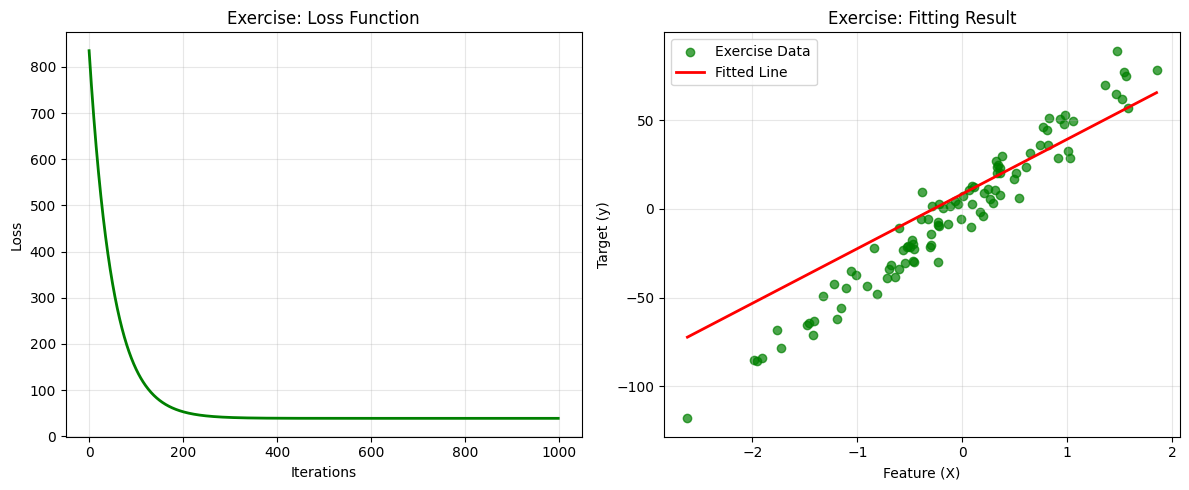


🎉 练习完成！最终损失: 39.027127


In [26]:
# 🎮 练习区域 - 尝试修改这些参数！

# 参数设置（你可以修改这些值）
LEARNING_RATE = 0.01      # 尝试: 0.001, 0.01, 0.1
ITERATIONS = 1000         # 尝试: 500, 1000, 2000
NOISE_LEVEL = 10          # 尝试: 5, 10, 20
SAMPLE_SIZE = 100         # 尝试: 50, 100, 200

print(f"🎯 当前参数设置：")
print(f"   学习率: {LEARNING_RATE}")
print(f"   迭代次数: {ITERATIONS}")
print(f"   噪声水平: {NOISE_LEVEL}")
print(f"   样本数量: {SAMPLE_SIZE}")

# 生成新数据
X_practice, y_practice = make_regression(
    n_samples=SAMPLE_SIZE, 
    n_features=1, 
    noise=NOISE_LEVEL, 
    random_state=42
)
y_practice = y_practice.reshape(-1, 1)

# 训练模型
model_practice = LinearRegression(X_practice, y_practice, normalize_data=True)
theta_practice, cost_history_practice = model_practice.train(
    alpha=LEARNING_RATE, 
    num_iterations=ITERATIONS
)

# 可视化结果
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cost_history_practice, color='green', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Exercise: Loss Function')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_practice, y_practice, alpha=0.7, color='green', label='Exercise Data')
X_line_practice = np.linspace(X_practice.min(), X_practice.max(), 100).reshape(-1, 1)
y_pred_line_practice = model_practice.predict(X_line_practice)
plt.plot(X_line_practice, y_pred_line_practice, color='red', linewidth=2, label='Fitted Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Exercise: Fitting Result')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


print(f"\n🎉 练习完成！最终损失: {cost_history_practice[-1]:.6f}")